<a href="https://colab.research.google.com/github/mohiiieldin/Predict-the-Global-Spread-of-COVID-19/blob/master/my_Copy_of_Covid_19_Data_Prep_Allcountries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zindi Covid-19 Contest - Data Prep

This notebook shows how the data for the Zindi contest - Predicting the Global Spread of COVID-19 is derived. As this is an evolving situation, the dataset is not fixed at the start of the contest. Instead, you may use all available data at a given time, and are encouraged to keep incorporating new data as it becomes available. Each week, the leaderboard wil reset and a new submission file will be shared covering the most recent test period. The ultimate goal is to make predictions fo the time following the CLOSE of the competition - more info on the competition page.

In this notebook, we download the latest figures from https://github.com/CSSEGISandData/COVID-19, add some additional information, group by Country/Region, re-shape into the format required for submission and show how you can score your model on the latest data without needing to upload submissions to Zindi. 

## Downloading the Data

The data has been curated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), and is pubically available on their GitHub repository. We clone the repository to get the data.


In [0]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 17475, done.
remote: Total 17475 (delta 0), reused 0 (delta 0), pack-reused 17475
Receiving objects: 100% (17475/17475), 68.10 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (8809/8809), done.


## Loading the Data

In [0]:
import pandas as pd

In [0]:
cases = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8


In [0]:
deaths = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2


# Adding All Countries 

To avoid changing the submission format, Zindi are now using a set list of countries. This section will be updated as new Countries/Regions are added to the JHU data, to try and maintain a consistent mapping.

In [0]:
# Download a list of countries from the UN
!curl -o EF.xlsx https://untermportal.un.org/unterm/country/downloadfile?targetLanguage=fr

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11197  100 11197    0     0  44256      0 --:--:-- --:--:-- --:--:-- 44256


In [0]:
countries = pd.read_excel('EF.xlsx')[:193]
countries.head(2)

,English short,French short,English formal,French formal
0,Afghanistan,Afghanistan (l'),the Islamic Republic of Afghanistan,la République islamique d'Afghanistan
1,Albania,Albanie (l'),the Republic of Albania,la République d'Albanie


In [0]:
# Which regions in the JHU data have direct matches in countries?
print(deaths.shape, deaths['Country/Region'].unique().shape)
print(deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique().shape)

(256, 75) (180,)
(148,)


In [0]:
# For those with direct matches, add a new column ['Territory']
deaths['Territory'] = ''
for c in deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  deaths.loc[deaths['Country/Region'] == c, 'Territory'] = c

# Same for cases
cases['Territory'] = ''
for c in cases.loc[cases['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  cases.loc[cases['Country/Region'] == c, 'Territory'] = c

deaths.loc[deaths['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
cases.loc[cases['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'

In [0]:
# The problem ones we need to reconcile manually:
print(deaths.loc[~deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique())

['Bahamas' 'Bolivia' 'Brunei' 'Central African Republic'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' "Cote d'Ivoire"
 'Diamond Princess' 'Dominican Republic' 'Gambia' 'Holy See' 'Iran'
 'Korea, South' 'Moldova' 'Netherlands' 'Niger' 'Philippines' 'Russia'
 'Sudan' 'Taiwan*' 'Tanzania' 'United Arab Emirates' 'United Kingdom' 'US'
 'Venezuela' 'Vietnam' 'Syria' 'Laos' 'West Bank and Gaza' 'Kosovo'
 'Burma' 'MS Zaandam']


In [0]:
# Add them manually:
deaths.loc[deaths['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
deaths.loc[deaths['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
deaths.loc[deaths['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
deaths.loc[deaths['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
deaths.loc[deaths['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
deaths.loc[deaths['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
deaths.loc[deaths['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
deaths.loc[deaths['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
deaths.loc[deaths['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
deaths.loc[deaths['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
deaths.loc[deaths['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
deaths.loc[deaths['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
deaths.loc[deaths['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
deaths.loc[deaths['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
deaths.loc[deaths['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
deaths.loc[deaths['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
deaths.loc[deaths['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
deaths.loc[deaths['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
deaths.loc[deaths['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
deaths.loc[deaths['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', deaths.loc[deaths['Territory'] == '']['Country/Region'].unique())
print(deaths.shape)
deaths=deaths.loc[deaths['Territory']!= '']
print(deaths.shape)

# And for cases
# Add them manually:
cases.loc[cases['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
cases.loc[cases['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
cases.loc[cases['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
cases.loc[cases['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
cases.loc[cases['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
cases.loc[cases['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
cases.loc[cases['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
cases.loc[cases['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
cases.loc[cases['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
cases.loc[cases['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
cases.loc[cases['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
cases.loc[cases['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
cases.loc[cases['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
cases.loc[cases['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
cases.loc[cases['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
cases.loc[cases['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
cases.loc[cases['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
cases.loc[cases['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
cases.loc[cases['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
cases.loc[cases['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
cases.loc[cases['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
cases.loc[cases['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
cases.loc[cases['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
cases.loc[cases['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', cases.loc[cases['Territory'] == '']['Country/Region'].unique())
print(cases.shape)
cases=cases.loc[cases['Territory']!= '']
print(cases.shape)

Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'Burma'
 'MS Zaandam']
(256, 76)
(250, 76)
Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'Burma'
 'MS Zaandam']
(256, 76)
(250, 76)


In [0]:
# Add the rest of the countries with cases set to 0 (!! Use with caution as data may be unreported)
import numpy as np

remainder = countries.loc[~countries['English short'].isin(deaths.Territory.unique())]
print('Adding:', remainder['English short'].unique())
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(deaths.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = deaths.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  deaths = pd.concat([deaths, row_df], ignore_index=True)
print(deaths.shape)

# And for cases
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(cases.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = cases.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  cases = pd.concat([cases, row_df], ignore_index=True)
print(cases.shape)

Adding: ['Comoros (the)' 'Kiribati' 'Lesotho' 'Malawi' 'Marshall Islands (the)'
 'Micronesia (Federated States of)' 'Myanmar' 'Nauru' 'Palau'
 'Republic of Korea (the)' 'Samoa' 'Sao Tome and Principe'
 'Solomon Islands' 'Sudan (the)' 'Tajikistan' 'Tonga' 'Turkmenistan'
 'Tuvalu' 'Vanuatu' 'Yemen']
(270, 76)
(270, 76)


# Splitting out some regions into their own territories

Some regions are listed as part of one country, but due to geography or politics can be considered a separate entity. Without getting too political, let's separate out a few of these.

In [0]:
# Taiwan, St. Martin, Faroe Islands, St. Barthelemy, French Polynesia, French Guiana, Mayotte, Guadeloupe, Curacao, Cayman Islands, Reunion, Aruba, monserrat, Greenland, new caledonia, Bermuda.
for r in ['St Martin', 'Faroe Islands', 'Saint Barthelemy', 'French Polynesia', 'French Guiana', 'Mayotte',
          'Guadeloupe', 'Curacao', 'Cayman Islands', 'Reunion', 'Aruba', 'Montserrat', 'Greenland', 'New Caledonia', 'Bermuda']:
  if deaths.loc[deaths['Province/State']==r].shape[0]<1:
    print(r)
  deaths.loc[deaths['Province/State']==r, 'Territory'] = r
  cases.loc[cases['Province/State']==r, 'Territory'] = r


## Adding Population info

This is optional, but this section adds population info. Use with caution, and feel free to make manual corrections. 

In [0]:
!pip install countryinfo # Run if needed

     |████████████████████████████████| 204kB 8.7MB/s 
  Created wheel for countryinfo: filename=countryinfo-0.1.0-cp36-none-any.whl size=592040 sha256=4a75c27d04c0bb2aa7162c5aaaf84020a8521c429c4ba3e853744fe2e593a50d
  Stored in directory: /root/.cache/pip/wheels/78/59/c4/93bb8e79dcbf95375817c1ecf4c1573bd0c17e9376e2052f95
Successfully built countryinfo


In [0]:
209 - 166

43

In [0]:
from countryinfo import CountryInfo

pops = {}
fails = []

regions = sorted(deaths['Territory'].unique())
for r in regions:
  try:
    country = CountryInfo(r)
    pops[r] = country.info()['population']
  except:
    fails.append(r)
    print('No pop data for', r)

No pop data for Andorra
No pop data for Bahamas (the)
No pop data for Bolivia (Plurinational State of)
No pop data for Brunei Darussalam
No pop data for Cabo Verde
No pop data for Central African Republic (the)
No pop data for Comoros (the)
No pop data for Congo (the)
No pop data for Curacao
No pop data for Czechia
No pop data for Côte d'Ivoire
No pop data for Democratic People's Republic of Korea (the)
No pop data for Democratic Republic of the Congo (the)
No pop data for Dominican Republic (the)
No pop data for Eswatini
No pop data for Gambia (the)
No pop data for Iran (Islamic Republic of)
No pop data for Lao People's Democratic Republic (the)
No pop data for Marshall Islands (the)
No pop data for Micronesia (Federated States of)
No pop data for Montenegro
No pop data for Myanmar
No pop data for Netherlands (the)
No pop data for Niger (the)
No pop data for North Macedonia
No pop data for Philippines (the)
No pop data for Republic of Korea (the)
No pop data for Republic of Moldova (t

In [0]:
print(len(pops))
print(deaths['Territory'].nunique())

166
209


In [0]:
# Manual fixes
# As you can see, this missed many territories, but is provided as a starting point. You can manually add or source better datasets.

In [0]:
# Adding in population as a column
cols = list(deaths.columns)
deaths['Population'] = deaths['Country/Region'].map(pops)
deaths = deaths[cols[:2]+['Territory','Population']+cols[2:-1]] # Better ordering
deaths.head()

,Province/State,Country/Region,Territory,Population,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,Afghanistan,26023100.0,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,Albania,2895947.0,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,Algeria,38700000.0,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,Angola,24383301.0,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2


## Some Quick Visualizations

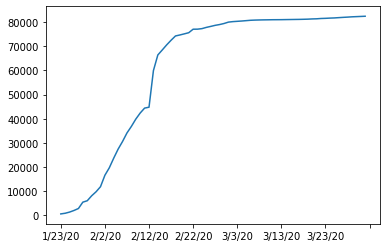

In [0]:
# Cases for mainland China (note - data is cumulative)
cases.groupby('Territory').sum().loc['China'][3:].plot()

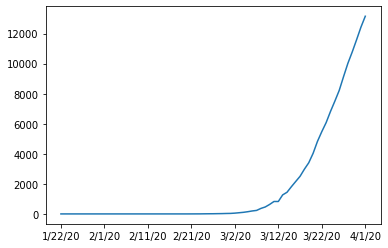

In [0]:
# Deaths in Italy
deaths.groupby('Territory').sum().loc['Italy'][3:].plot()

In [0]:
# Looking at raw numbers vs pop adjusted figures
grouped = deaths.groupby('Territory').sum()
# grouped['3/12/20'].sort_values(ascending=False).head(20) # Raw numbers
(grouped['3/12/20']*1e7/deaths.groupby('Territory').mean()['Population']).sort_values(ascending=False).head(20) # Scaled by population (deaths/10M people)

Territory
San Marino     916.226369
Italy          136.088896
China           23.202230
Guyana          12.740574
Spain           11.825983
Lebanon          7.309942
France           7.264142
Switzerland      4.887705
Albania          3.453102
Panama           2.693014
Belgium          2.672494
Iraq             2.221941
Ireland          1.567890
Bulgaria         1.380133
Australia        1.265988
Japan            1.259049
Austria          1.172714
Sweden           1.026955
Greece           0.909704
Germany          0.371365
dtype: float64

## Preparing a 'sample submission' file and scoring locally

This will mimic the way submissions to Zindi will work. We'll generate an example submission file along with a reference file (the correct answers, used for scoring). 

Dates for the submission will change as the competition goes on. Here, we'll use the last available week of data for local testing. The next section shows how to create a submission file that can be uploaded to Zindi for scoring.

In [0]:
# Creating the 'reference' file

TEST_PERIOD = 7 # In days

test_dates = deaths.columns[-TEST_PERIOD:] # The last two weeks worth of data
countries = deaths.groupby('Territory').sum()[test_dates] # Group by country/region, and select only the columns for the test_period

# Create a new dataframe, with a Region X Date column. 
reference = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(countries.stack().index.to_flat_index()))), # Check output to see what this is doing
    'target':countries.stack() # The target we'll be predicting: cumulative number of cases for a given region at a given date.
}).reset_index(drop=True) # Don't need the multiIndex created with Stack
reference.to_csv('reference.csv', index=False)
reference.head()

,Territory X Date,target
0,Afghanistan X 3/26/20,4
1,Afghanistan X 3/27/20,4
2,Afghanistan X 3/28/20,4
3,Afghanistan X 3/29/20,4
4,Afghanistan X 3/30/20,4


In [0]:
# Sample submission is the same as the reference file, just with target set to 0
print(reference.target.sum())
ss = reference.copy()
ss['target'] = 0
print(ss.target.sum())
ss.to_csv('SampleSubLocal.csv', index=False)

242154
0


# Matching the Zindi Submission File

The competition requires that you submit a file containing predictions for the whole of the time period between March 6 and June 7. The way it works is that only the relevant week's worth of predictions will be evaluated. Let's create an appropriate file.

In [0]:
dates = pd.date_range(start='2020-03-06', end='2020-06-07', freq='1d')
ids = []
for c in sorted(deaths['Territory'].unique()):
  for d in dates:
    ids.append((c + ' X ' + d.strftime('%m/%d/%y')).replace(" X 0"," X "))
ss = pd.DataFrame({
    'Territory X Date':ids,
    'target':0
})
ss.to_csv('SampleSubmission.csv', index=False)
ss.head()

,Territory X Date,target
0,Afghanistan X 3/06/20,0
1,Afghanistan X 3/07/20,0
2,Afghanistan X 3/08/20,0
3,Afghanistan X 3/09/20,0
4,Afghanistan X 3/10/20,0


In [0]:
ss.tail()

,Territory X Date,target
19641,Zimbabwe X 6/03/20,0
19642,Zimbabwe X 6/04/20,0
19643,Zimbabwe X 6/05/20,0
19644,Zimbabwe X 6/06/20,0
19645,Zimbabwe X 6/07/20,0


# Creating 'Train.csv'

You can shape your training data in any way you want, **provided that it does not include data from the test period**. The goal is to predict into the future. While the competition is open, you could simply use all the available data for training and get a near-perfect score. However, this won't represent how well your model will do in the future. The final score will be based on new, unseen data based on events after the competition closes. 

This is how the 'train.csv' file available from Zindi is generated:

In [0]:
train_dates = deaths.columns[6:-TEST_PERIOD] # The dates for the train perion

# Grouping by territory
country_deaths = deaths.groupby('Territory').sum()[train_dates] 
country_cases = cases.groupby('Territory').sum()[train_dates] 

# Creating the dataframe
train = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(country_deaths.stack().index.to_flat_index()))), 
    'target':country_deaths.stack(),
    'cases':country_cases.stack() # Added as they may be useful
}).reset_index(drop=True)

# Add Separate Region and Date columns
train['Territory'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[0])
train['Date'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[1])

# Saving and viewing
train.to_csv('train.csv', index=False)
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [0]:
# Add Separate Region and Date columns
from datetime import datetime
train['Territory'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[0])
train['Date'] = train['Territory X Date'].apply(lambda x: datetime(
        int("20"+x.split(' X ')[1].split("/")[2]),
        int(x.split(' X ')[1].split("/")[0]),
        int(x.split(' X ')[1].split("/")[1])
        ))
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26


In [0]:
train.to_csv('train.csv', index=False)

In [0]:
train

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26
...,...,...,...,...,...
13162,Zimbabwe X 3/20/20,0,1,Zimbabwe,2020-03-20
13163,Zimbabwe X 3/21/20,0,3,Zimbabwe,2020-03-21
13164,Zimbabwe X 3/22/20,0,3,Zimbabwe,2020-03-22
13165,Zimbabwe X 3/23/20,1,3,Zimbabwe,2020-03-23


Zindi will update the training data weekly, but you are also encouraged to use the data from JH as shown in this notebook to keep up with the latest information.

In [0]:
!pip install catboost

     |████████████████████████████████| 64.4MB 45kB/s 


In [0]:
# from datetime import datetime
# importing main libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta,date
import pandas_profiling 
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae

#importing machine learning libraries
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.cluster import KMeans


from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

#importing regressors
from xgboost.sklearn import XGBRegressor
#from catboost import CatBoostRegressor
from numpy import sqrt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
#from catboost import Pool
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor


#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#allowing visualizastions inline
%matplotlib inline

#Pipeline and encoders
#from sklearn.compose import columnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def AllEncoder(train,validation,test ,entype,cols_index):

  encoder = None
  if entype == "l": 
    lab_enc = LabelEncoder()
    for col_index in cols_index :
      train[col_index] = lab_enc.fit_transform(train[col_index])
      validation[col_index] = lab_enc.transform(validation[col_index])
      test[col_index] = lab_enc.transform(test[col_index])        

  elif entype == "h" :
     oh_enc = OneHotEncoder(handle_unknown = 'ignore' , sparse = False)
     OH_cols_train = pd.DataFrame(oh_enc.fit_transform(train[cols_index]))
     OH_cols_valid = pd.DataFrame(oh_enc.transform(validation[cols_index]))
     OH_cols_test = pd.DataFrame(oh_enc.transform(test[cols_index]))
     OH_cols_train.index = train.index
     OH_cols_valid.index = validation.index
     OH_cols_test.index = test.index
     numerical_train = train.drop(cols_index , axis = 1)
     numerical_valid = validation.drop(cols_index , axis = 1)
     numerical_test = test.drop(cols_index , axis = 1)
     train = pd.concat([numerical_train , OH_cols_train], axis = 1 ) 
     validation = pd.concat([numerical_valid , OH_cols_valid] , axis = 1)
     test = pd.concat([numerical_test , OH_cols_test] , axis = 1)
  elif entype == "m" :
       
    #mean encoding
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 5 , shuffle = False )
    for train_index , val_index in kf.split(df) :
        X_train , X_val = df.iloc[train_index] , df.iloc[val_index]
        df.loc[val_index,'Terr_mean_encoded'] = X_val['Territory'].map(X_train.groupby('Territory')['target'].mean())
    df['Terr_mean_encoded'].fillna(df.target.mean(), inplace=True) # filling the na with globel mean
    ter_enc = {'Territory':df['Territory'] , 'Terr_mean_encoded' : df['Terr_mean_encoded']}
    test['Terr_mean_encoded'] = df['Territory'].map()


  else : 
      print("use h , l or m for entype")
    
    
  return  train,validation,test


def handle_bad_cols(trainx,val_test):
  object_cols = [col for col in trainx.columns if trainx[col].dtype == 'object'] 
  good_label_cols = [col for col in object_cols if set(trainx[col]) == set(val_test[col]) ]
  bad_label_cols = list( set(object_cols) - set(good_label_cols) )
  for i in bad_label_cols:
    most = trainx[i].value_counts().index[0]
    labels = trainx[i].unique()
    val_test[i] = val_test[i].apply(lambda x : x if x in labels else most)
  return val_test


In [0]:
#adding the population number in the train
# train['Pop'] = train['Territory'].map(pops)
# train = train.fillna(train.Pop.mean())
# train.drop("Pop",axis=1)

In [0]:
trainwithoutcases = train.drop(["Territory X Date" ],axis=1)

trainwithoutcases["month"] = trainwithoutcases.Date.apply(lambda x : x.month)
trainwithoutcases["day"] = trainwithoutcases.Date.apply(lambda x : x.day)
#trainwithoutcases["weekday"] = trainwithoutcases.Date.apply(lambda x : x.weekday())


trainwithoutcases["deathrate"] = trainwithoutcases.target / trainwithoutcases.cases
trainwithoutcases.fillna(0,inplace=True)
ter_enc = {}

regions = sorted(trainwithoutcases['Territory'].unique())
for r in regions:
    x = trainwithoutcases[trainwithoutcases.Territory == r]['deathrate']
    ter_enc[r] = x.values[len(x.values)-1]




In [0]:
from datetime import datetime
lastweekindex = trainwithoutcases[trainwithoutcases.Date >= datetime(2020,3,18)  ].index
validate = trainwithoutcases.iloc[lastweekindex]
trainwithoutcases = trainwithoutcases.drop(lastweekindex) 

#trainwithoutcases.drop("Date",axis=1,inplace=True)
#validate.drop("Date",axis=1,inplace=True)


In [0]:
from datetime import datetime
submission = pd.read_csv("SampleSubmission.csv")
# Add Separate Region and Date columns
submission['Territory'] = submission['Territory X Date'].apply(lambda x: x.split(' X ')[0])
submission['Date'] = submission['Territory X Date'].apply(lambda x: datetime(
        int("20"+x.split(' X ')[1].split("/")[2]),
        int(x.split(' X ')[1].split("/")[0]),
        int(x.split(' X ')[1].split("/")[1])
        ))

submissionclean = submission.drop(["Territory X Date"],axis=1)

#submission['week_num'] = submission.Date.apply(lambda d: datetime(d).strftime("%V"))
#submission = submission.merge(train.drop(['month','day','Date'],axis = 1) , on ['Territory','week_num']) 

#submissionclean["year"] = submissionclean.Date.apply(lambda x : x.year)
submissionclean["month"] = submissionclean.Date.apply(lambda x : x.month)
submissionclean["day"] = submissionclean.Date.apply(lambda x : x.day)
#submissionclean["weekday"] = submissionclean.Date.apply(lambda x : x.weekday())
submission.drop("Date",axis=1,inplace=True)
#submissionclean.drop("Date",axis=1,inplace=True)
#submissionclean['Terr_mean_encoded'] = submissionclean['Territory'].map(ter_enc)




In [0]:
submissionclean_death = submissionclean.copy()

In [0]:
submissionclean_death['deathrate'] = submissionclean_death['Territory'].map(ter_enc)

In [0]:
submissionclean_death['cases'] = test['cases_weekly']
submissionclean_death.fillna(0 , inplace = True)
submissionclean_death

,target,Territory,Date,month,day,deathrate,cases
0,0,Afghanistan,2020-03-06,3,6,0.013514,1.0
1,0,Afghanistan,2020-03-07,3,7,0.013514,1.0
2,0,Afghanistan,2020-03-08,3,8,0.013514,1.0
3,0,Afghanistan,2020-03-09,3,9,0.013514,1.0
4,0,Afghanistan,2020-03-10,3,10,0.013514,1.0
...,...,...,...,...,...,...,...
19641,0,Zimbabwe,2020-06-03,6,3,0.333333,0.0
19642,0,Zimbabwe,2020-06-04,6,4,0.333333,0.0
19643,0,Zimbabwe,2020-06-05,6,5,0.333333,0.0
19644,0,Zimbabwe,2020-06-06,6,6,0.333333,0.0


In [0]:
trainwithoutcases

,target,cases,Territory,month,day,deathrate
0,0,0,Afghanistan,1,22,0.0
1,0,0,Afghanistan,1,23,0.0
2,0,0,Afghanistan,1,24,0.0
3,0,0,Afghanistan,1,25,0.0
4,0,0,Afghanistan,1,26,0.0
...,...,...,...,...,...,...
13155,0,0,Zimbabwe,3,13,0.0
13156,0,0,Zimbabwe,3,14,0.0
13157,0,0,Zimbabwe,3,15,0.0
13158,0,0,Zimbabwe,3,16,0.0


# by default put the max number of cases for each country .. then overwrite the rows that exist in the train set and leave the rest hence the week that we will pridect will always have the max number of cases happend in the week before it 

In [0]:
cases_enc = {}

regions = sorted(submissionclean_death['Territory'].unique())
for r in regions:
    cases_per_Terr = submissionclean_death[submissionclean_death.Territory == r]['cases']
    cases_enc[r] = np.max(cases_per_Terr.values)
cases_enc
#submissionclean_death[submissionclean_death.Date > datetime(2020,3,23)]

{'Afghanistan': 74.0,
 'Albania': 123.0,
 'Algeria': 264.0,
 'Andorra': 164.0,
 'Angola': 3.0,
 'Antigua and Barbuda': 3.0,
 'Argentina': 387.0,
 'Armenia': 249.0,
 'Aruba': 12.0,
 'Australia': 2044.0,
 'Austria': 5283.0,
 'Azerbaijan': 87.0,
 'Bahamas (the)': 5.0,
 'Bahrain': 392.0,
 'Bangladesh': 39.0,
 'Barbados': 18.0,
 'Belarus': 81.0,
 'Belgium': 4269.0,
 'Belize': 1.0,
 'Benin': 6.0,
 'Bermuda': 6.0,
 'Bhutan': 2.0,
 'Bolivia (Plurinational State of)': 29.0,
 'Bosnia and Herzegovina': 166.0,
 'Botswana': 0.0,
 'Brazil': 2247.0,
 'Brunei Darussalam': 104.0,
 'Bulgaria': 218.0,
 'Burkina Faso': 114.0,
 'Burundi': 0.0,
 'Cabo Verde': 3.0,
 'Cambodia': 91.0,
 'Cameroon': 66.0,
 'Canada': 2790.0,
 'Cayman Islands': 6.0,
 'Central African Republic (the)': 3.0,
 'Chad': 3.0,
 'Chile': 922.0,
 'China': 81591.0,
 'Colombia': 378.0,
 'Comoros (the)': 0.0,
 'Congo (the)': 4.0,
 'Costa Rica': 177.0,
 'Croatia': 382.0,
 'Cuba': 48.0,
 'Curacao': 6.0,
 'Cyprus': 124.0,
 'Czechia': 1394.0,
 "C

In [0]:
submissionclean_death['cases'] = submissionclean_death['Territory'].map(cases_enc)
index = submissionclean[submissionclean.Date <= train.Date[len(train)-1]].target.index
index2 = train[train.Date >= submissionclean.Date[0]].target.index 
#timesteps = len(submission.iloc[index].Date.unique())
#print(len(index),len(index2))
for i in range(len(index)):
#submissionclean.target[index[i]]= train.target[index2[i]]
  submissionclean_death.cases[index[i]]= train.cases[index2[i]] 

submissionclean_death.fillna(0 , inplace = True)  
submissionclean_death

,target,Territory,Date,month,day,deathrate,cases
0,0,Afghanistan,2020-03-06,3,6,0.013514,1.0
1,0,Afghanistan,2020-03-07,3,7,0.013514,1.0
2,0,Afghanistan,2020-03-08,3,8,0.013514,4.0
3,0,Afghanistan,2020-03-09,3,9,0.013514,4.0
4,0,Afghanistan,2020-03-10,3,10,0.013514,5.0
...,...,...,...,...,...,...,...
19641,0,Zimbabwe,2020-06-03,6,3,0.333333,3.0
19642,0,Zimbabwe,2020-06-04,6,4,0.333333,3.0
19643,0,Zimbabwe,2020-06-05,6,5,0.333333,3.0
19644,0,Zimbabwe,2020-06-06,6,6,0.333333,3.0


In [0]:
# check that we overwrite cases i the train set right
from datetime import datetime
set(submissionclean_death[submissionclean_death.Date <= datetime(2020,3,24) ].cases) == set(TrainFull[TrainFull.Date >= datetime(2020,3,6)].cases)

True

In [0]:
trainwithoutcasesL

,target,cases,Territory,Date,month,day,deathrate
0,0,0,0,2020-01-22,1,22,0.0
1,0,0,0,2020-01-23,1,23,0.0
2,0,0,0,2020-01-24,1,24,0.0
3,0,0,0,2020-01-25,1,25,0.0
4,0,0,0,2020-01-26,1,26,0.0
...,...,...,...,...,...,...,...
13363,0,0,208,2020-03-13,3,13,0.0
13364,0,0,208,2020-03-14,3,14,0.0
13365,0,0,208,2020-03-15,3,15,0.0
13366,0,0,208,2020-03-16,3,16,0.0


In [0]:
# Making one Label encoding to the Territory feature
trainwithoutcasesL , validateL , submissioncleanL = AllEncoder(trainwithoutcases,validate,submissionclean,"l",["Territory"])

In [0]:
# One set validation
models = []
# models.append(('cat',CatBoostRegressor(verbose=False,max_depth=11,task_type="GPU",iterations=1500,learning_rate=0.003,l2_leaf_reg=0.4)))
models.append(('xgb',XGBRegressor(max_depth= 17 )))
models.append(('tr',DecisionTreeRegressor()))


for name, model in models:
  model.fit(trainwithoutcasesL.drop(["target",'Date'],axis =1),trainwithoutcasesL.target)
  preds = model.predict(validateL.drop(["target","Date"],axis =1))
  print(name , " ", mae(validateL.target,preds))


[17:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb   20.69637728166994
tr   26.404904306220097


In [0]:
TrainFull = pd.concat([trainwithoutcasesL,validateL])

In [0]:
TrainFull = TrainFull.reindex(sorted(TrainFull.columns), axis=1)
submissioncleanL = submissioncleanL.reindex(sorted(submissioncleanL.columns), axis=1)

In [0]:
# Submitting DecisionTree to be tested on Zindi
tr  = DecisionTreeRegressor()
tr.fit(TrainFull.drop(["target",'Territory'],axis=1),TrainFull.target)
preds = tr.predict(submissionclean_mean.drop(["target",'Territory'],axis=1))

#submission.drop(["Territory", ],axis=1 , inplace = True)
submission.target = preds 
submission["Territory X Date"] = submission["Territory X Date"].apply(lambda  x :  x.replace(" X 0"," X ") if " X 0" in x else x  )
submission.to_csv("tree_mean_enc_1_4.csv",index=False)

In [0]:
# Submitting XGB to be tested on Zindi
xgb  = XGBRegressor(verbose = False , max_depth= 10)
xgb.fit(trainwithoutcasesL.drop(["target",'Date',"deathrate","cases"],axis=1),trainwithoutcasesL.target)
preds = xgb.predict(submissioncleanL.drop(["target",'Date'],axis=1))

submission.target = preds 
submission["Territory X Date"] = submission["Territory X Date"].apply(lambda  x :  x.replace(" X 0"," X ").replace("4/0","4/") )
submission["target"] = submission["target"].apply(lambda  x :  0 if x < 0 else x )
submission.to_csv("xgb_newbase.csv",index=False)

[17:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
submission

,Territory X Date,target,Territory
0,Afghanistan X 3/06/20,-0.000791,Afghanistan
1,Afghanistan X 3/07/20,-0.000791,Afghanistan
2,Afghanistan X 3/08/20,-0.000025,Afghanistan
3,Afghanistan X 3/09/20,-0.000025,Afghanistan
4,Afghanistan X 3/10/20,-0.000025,Afghanistan
...,...,...,...
19641,Zimbabwe X 6/03/20,-0.001811,Zimbabwe
19642,Zimbabwe X 6/04/20,0.010491,Zimbabwe
19643,Zimbabwe X 6/05/20,0.001877,Zimbabwe
19644,Zimbabwe X 6/06/20,0.023704,Zimbabwe


# EDA and Data cleaning

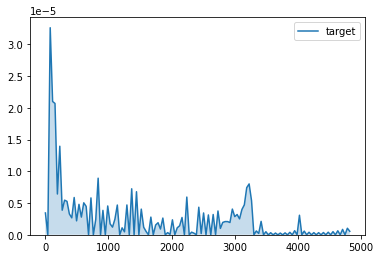

In [0]:
sns.kdeplot( data = train['target'] , shade = True) 

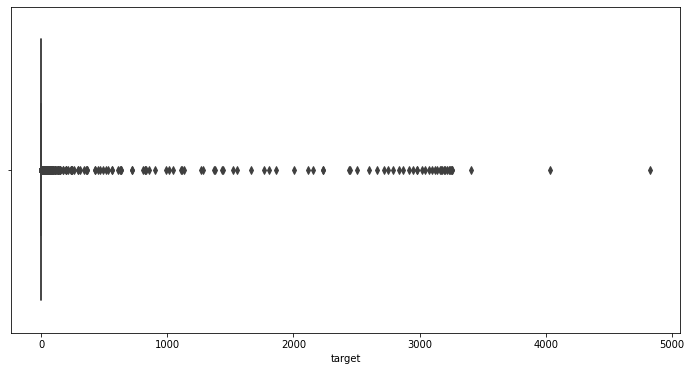

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(train.target)


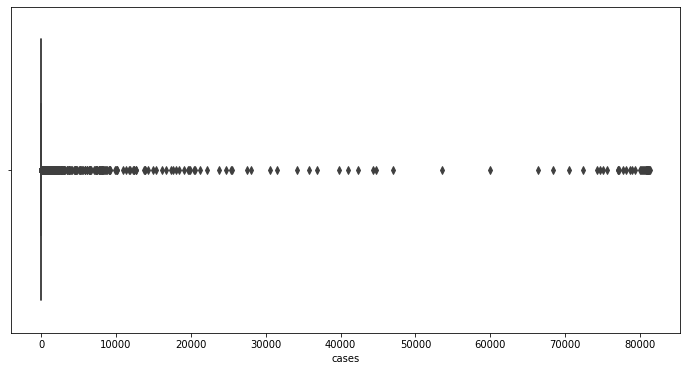

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(train.cases)


# Feature engineering

In [0]:
train1 = trainwithoutcases.copy()

In [0]:
train1['week_num'] = train1.Date.apply(lambda d: d.strftime("%V"))


In [0]:
train1

,target,cases,Territory,Date,month,day,deathrate,week_num
0,0,0,Afghanistan,2020-01-22,1,22,0.000000,04
1,0,0,Afghanistan,2020-01-23,1,23,0.000000,04
2,0,0,Afghanistan,2020-01-24,1,24,0.000000,04
3,0,0,Afghanistan,2020-01-25,1,25,0.000000,04
4,0,0,Afghanistan,2020-01-26,1,26,0.000000,04
...,...,...,...,...,...,...,...,...
13162,0,1,Zimbabwe,2020-03-20,3,20,0.000000,12
13163,0,3,Zimbabwe,2020-03-21,3,21,0.000000,12
13164,0,3,Zimbabwe,2020-03-22,3,22,0.000000,12
13165,1,3,Zimbabwe,2020-03-23,3,23,0.333333,13


In [0]:
train1['cases_weekly'] = train1.groupby(['Territory','week_num'])['cases'].transform('max')

train1[train1.Territory == 'Italy'].tail(10)

,target,cases,Territory,Date,month,day,deathrate,week_num,target_weekly,cases_weekly
5809,0,2,Italy,2020-02-04,2,4,0.000000,06,0,3
5810,0,2,Italy,2020-02-05,2,5,0.000000,06,0,3
5811,0,2,Italy,2020-02-06,2,6,0.000000,06,0,3
5812,0,3,Italy,2020-02-07,2,7,0.000000,06,0,3
5813,0,3,Italy,2020-02-08,2,8,0.000000,06,0,3
5814,0,3,Italy,2020-02-09,2,9,0.000000,06,0,3
5815,0,3,Italy,2020-02-10,2,10,0.000000,07,0,3
5816,0,3,Italy,2020-02-11,2,11,0.000000,07,0,3
5817,0,3,Italy,2020-02-12,2,12,0.000000,07,0,3
5818,0,3,Italy,2020-02-13,2,13,0.000000,07,0,3


In [0]:
train1_shifted = train1.copy()
train1_shifted['week_num+1'] = train1_shifted['week_num'].astype('int32') + 1
train1_shifted

,target,cases,Territory,Date,month,day,deathrate,week_num,target_weekly,cases_weekly,week_num+1
0,0,0,Afghanistan,2020-01-22,1,22,0.000000,04,0,0,5
1,0,0,Afghanistan,2020-01-23,1,23,0.000000,04,0,0,5
2,0,0,Afghanistan,2020-01-24,1,24,0.000000,04,0,0,5
3,0,0,Afghanistan,2020-01-25,1,25,0.000000,04,0,0,5
4,0,0,Afghanistan,2020-01-26,1,26,0.000000,04,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
13162,0,1,Zimbabwe,2020-03-20,3,20,0.000000,12,0,3,13
13163,0,3,Zimbabwe,2020-03-21,3,21,0.000000,12,0,3,13
13164,0,3,Zimbabwe,2020-03-22,3,22,0.000000,12,0,3,13
13165,1,3,Zimbabwe,2020-03-23,3,23,0.333333,13,1,3,14


In [0]:
train1_shifted[train1_shifted.Territory == 'Italy'].head(50)


,target,cases,Territory,Date,month,day,deathrate,week_num,target_weekly,cases_weekly,week_num+1
5796,0,0,Italy,2020-01-22,1,22,0.000000,04,0,0,5
5797,0,0,Italy,2020-01-23,1,23,0.000000,04,0,0,5
5798,0,0,Italy,2020-01-24,1,24,0.000000,04,0,0,5
5799,0,0,Italy,2020-01-25,1,25,0.000000,04,0,0,5
5800,0,0,Italy,2020-01-26,1,26,0.000000,04,0,0,5
5801,0,0,Italy,2020-01-27,1,27,0.000000,05,0,2,6
5802,0,0,Italy,2020-01-28,1,28,0.000000,05,0,2,6
5803,0,0,Italy,2020-01-29,1,29,0.000000,05,0,2,6
5804,0,0,Italy,2020-01-30,1,30,0.000000,05,0,2,6
5805,0,2,Italy,2020-01-31,1,31,0.000000,05,0,2,6


In [0]:
submission = pd.read_csv("SampleSubmission.csv")
# Add Separate Region and Date columns
submission['Territory'] = submission['Territory X Date'].apply(lambda x: x.split(' X ')[0])
submission['Date'] = submission['Territory X Date'].apply(lambda x: datetime(
        int("20"+x.split(' X ')[1].split("/")[2]),
        int(x.split(' X ')[1].split("/")[0]),
        int(x.split(' X ')[1].split("/")[1])
        ))

submission1 = submission.copy()
submission1['week_num'] = submission1.Date.apply(lambda d: (d).strftime("%V"))
submission1['week_num'] = submission1['week_num'].astype('int32')



In [0]:
test = submission1.merge(train1_shifted[['cases_weekly','Territory','week_num+1']], left_on = ['Territory','week_num'],right_on = ['Territory','week_num+1'] ,how = 'left')
test

,Territory X Date,target,Territory,Date,week_num,cases_weekly,week_num+1
0,Afghanistan X 3/06/20,0,Afghanistan,2020-03-06,10,1.0,10.0
1,Afghanistan X 3/06/20,0,Afghanistan,2020-03-06,10,1.0,10.0
2,Afghanistan X 3/06/20,0,Afghanistan,2020-03-06,10,1.0,10.0
3,Afghanistan X 3/06/20,0,Afghanistan,2020-03-06,10,1.0,10.0
4,Afghanistan X 3/06/20,0,Afghanistan,2020-03-06,10,1.0,10.0
...,...,...,...,...,...,...,...
51200,Zimbabwe X 6/03/20,0,Zimbabwe,2020-06-03,23,NaN,NaN
51201,Zimbabwe X 6/04/20,0,Zimbabwe,2020-06-04,23,NaN,NaN
51202,Zimbabwe X 6/05/20,0,Zimbabwe,2020-06-05,23,NaN,NaN
51203,Zimbabwe X 6/06/20,0,Zimbabwe,2020-06-06,23,NaN,NaN


In [0]:
test[(test.Territory == 'Italy')].head(100)

,Territory X Date,target,Territory,Date,week_num,cases_weekly,week_num+1
22540,Italy X 3/06/20,0,Italy,2020-03-06,10,1694.0,10.0
22541,Italy X 3/06/20,0,Italy,2020-03-06,10,1694.0,10.0
22542,Italy X 3/06/20,0,Italy,2020-03-06,10,1694.0,10.0
22543,Italy X 3/06/20,0,Italy,2020-03-06,10,1694.0,10.0
22544,Italy X 3/06/20,0,Italy,2020-03-06,10,1694.0,10.0
...,...,...,...,...,...,...,...
22635,Italy X 3/19/20,0,Italy,2020-03-19,12,24747.0,12.0
22636,Italy X 3/19/20,0,Italy,2020-03-19,12,24747.0,12.0
22637,Italy X 3/19/20,0,Italy,2020-03-19,12,24747.0,12.0
22638,Italy X 3/20/20,0,Italy,2020-03-20,12,24747.0,12.0


In [0]:
trainWithLags.drop(['target_weekly_x','week_num-1','week_num_y'],axis = 1,inplace = True)
trainWithLags = trainWithLags.rename(columns = {'target_weekly_y':'target_weekly_shifted1'})
trainWithLags

,Territory X Date,target,cases,Territory,Date,Pop,week_num_x,target_weekly_shifted1
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,26023100.0,04,NaN
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,26023100.0,04,NaN
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,26023100.0,04,NaN
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,26023100.0,04,NaN
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,26023100.0,04,NaN
...,...,...,...,...,...,...,...,...
12744,Zimbabwe X 3/18/20,0,0,Zimbabwe,2020-03-18,13061239.0,12,NaN
12745,Zimbabwe X 3/19/20,0,0,Zimbabwe,2020-03-19,13061239.0,12,NaN
12746,Zimbabwe X 3/20/20,0,1,Zimbabwe,2020-03-20,13061239.0,12,NaN
12747,Zimbabwe X 3/21/20,0,3,Zimbabwe,2020-03-21,13061239.0,12,NaN


In [0]:
trainWithLags = trainWithLags.drop_duplicates()
#trainWithLags = trainWithLags.fillna(0)

In [0]:
trainWithLags.shape


(12749, 7)

In [0]:
lag_list = [1, 2, 3 ]

for lag in lag_list:
    ft_name = ('target_shifted_by%s' % lag)
    train1[ft_name] = train1.groupby(['Territory', 'week_num'])['target'].shift(lag)
    # Fill the empty shifted features with 0
    train1[ft_name].fillna(0, inplace=True)

In [0]:
train1

,Territory X Date,target,cases,Territory,Date,Pop,week_num,target_weekly,target_shifted_by1,target_shifted_by2,target_shifted_by3
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,26023100.0,04,0,NaN,NaN,NaN
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,26023100.0,04,0,0.0,NaN,NaN
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,26023100.0,04,0,0.0,0.0,NaN
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,26023100.0,04,0,0.0,0.0,0.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,26023100.0,04,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12744,Zimbabwe X 3/18/20,0,0,Zimbabwe,2020-03-18,13061239.0,12,0,0.0,0.0,NaN
12745,Zimbabwe X 3/19/20,0,0,Zimbabwe,2020-03-19,13061239.0,12,0,0.0,0.0,0.0
12746,Zimbabwe X 3/20/20,0,1,Zimbabwe,2020-03-20,13061239.0,12,0,0.0,0.0,0.0
12747,Zimbabwe X 3/21/20,0,3,Zimbabwe,2020-03-21,13061239.0,12,0,0.0,0.0,0.0


In [0]:
trainwithoutcases = train1.drop(["Territory X Date" ,'cases','week_num','Pop','target_weekly'],axis=1)

trainwithoutcases["month"] = trainwithoutcases.Date.apply(lambda x : x.month)
trainwithoutcases["day"] = trainwithoutcases.Date.apply(lambda x : x.day)
#trainwithoutcases["weekday"] = trainwithoutcases.Date.apply(lambda x : x.weekday())





In [0]:
lastweekindex = trainwithoutcases[trainwithoutcases.Date >= datetime(2020,3,16)  ].index
validate = trainwithoutcases.iloc[lastweekindex]
trainwithoutcases = trainwithoutcases.drop(lastweekindex) 

trainwithoutcases.drop("Date",axis=1,inplace=True)
validate.drop("Date",axis=1,inplace=True)


In [0]:
trainwithoutcases.isna().sum()

target                        0
Territory                     0
Pop                           0
week_num_x                    0
target_weekly_shifted1    11286
month                         0
day                           0
dtype: int64

In [0]:
validate

,target,Territory,target_shifted_by1,target_shifted_by2,target_shifted_by3,month,day
54,0,Afghanistan,0.0,0.0,0.0,3,16
55,0,Afghanistan,0.0,0.0,0.0,3,17
56,0,Afghanistan,0.0,0.0,0.0,3,18
57,0,Afghanistan,0.0,0.0,0.0,3,19
58,0,Afghanistan,0.0,0.0,0.0,3,20
...,...,...,...,...,...,...,...
12744,0,Zimbabwe,0.0,0.0,0.0,3,18
12745,0,Zimbabwe,0.0,0.0,0.0,3,19
12746,0,Zimbabwe,0.0,0.0,0.0,3,20
12747,0,Zimbabwe,0.0,0.0,0.0,3,21


In [0]:
x = submission1WithLags.drop_duplicates()
x.shape

(19646, 8)

In [0]:
submission1.shape

(19646, 6)

In [0]:
submission1WithLags = submission1.merge(train1[['target_weekly','Territory','week_num']], left_on = ['Territory','week_num-1'],right_on = ['Territory','week_num'] ,how = 'left')
submission1WithLags = submission1WithLags.rename(columns = {'target_weekly':'target_weekly_shifted1'})
submission1WithLags = submission1WithLags.drop_duplicates()

In [0]:
submission1WithLags.shape

(19646, 8)

In [0]:
train[(train.Territory == 'Italy')].tail(50)

,Territory X Date,target,cases,Territory,Date,week_num,target_weekly
5623,Italy X 2/2/20,0,2,Italy,2020-02-02,05,0
5624,Italy X 2/3/20,0,2,Italy,2020-02-03,06,0
5625,Italy X 2/4/20,0,2,Italy,2020-02-04,06,0
5626,Italy X 2/5/20,0,2,Italy,2020-02-05,06,0
5627,Italy X 2/6/20,0,2,Italy,2020-02-06,06,0
5628,Italy X 2/7/20,0,3,Italy,2020-02-07,06,0
5629,Italy X 2/8/20,0,3,Italy,2020-02-08,06,0
5630,Italy X 2/9/20,0,3,Italy,2020-02-09,06,0
5631,Italy X 2/10/20,0,3,Italy,2020-02-10,07,0
5632,Italy X 2/11/20,0,3,Italy,2020-02-11,07,0


In [0]:
submission1WithLags.drop(['week_num-1'	,'week_num_y'],axis= 1,inplace = True)
submissionclean = submission1WithLags.copy()

In [0]:
submissionclean["month"] = submissionclean.Date.apply(lambda x : x.month)
submissionclean["day"] = submissionclean.Date.apply(lambda x : x.day)
submissionclean.drop(["Date","Territory X Date"],axis=1,inplace=True)
#submissionclean['Terr_mean_encoded'] = submissionclean['Territory'].map(ter_enc)


AttributeError: ignored

In [0]:
submissionclean.week_num_x = submissionclean.week_num_x.astype('int32')
trainwithoutcases.week_num_x = trainwithoutcases.week_num_x.astype('int32')
validate.week_num_x = validate.week_num_x.astype('int32')

In [0]:
from datetime import datetime
submission = pd.read_csv("SampleSubmission.csv")
# Add Separate Region and Date columns
submission['Territory'] = submission['Territory X Date'].apply(lambda x: x.split(' X ')[0])
submission['Date'] = submission['Territory X Date'].apply(lambda x: datetime(
        int("20"+x.split(' X ')[1].split("/")[2]),
        int(x.split(' X ')[1].split("/")[0]),
        int(x.split(' X ')[1].split("/")[1])
        ))

submissionclean = submission.copy()

#submission['week_num'] = submission.Date.apply(lambda d: datetime(d).strftime("%V"))
#submission = submission.merge(train.drop(['month','day','Date'],axis = 1) , on ['Territory','week_num']) 

#submissionclean["year"] = submissionclean.Date.apply(lambda x : x.year)
submissionclean["month"] = submissionclean.Date.apply(lambda x : x.month)
submissionclean["day"] = submissionclean.Date.apply(lambda x : x.day)
#submissionclean["weekday"] = submissionclean.Date.apply(lambda x : x.weekday())
#submission.drop("Date",axis=1,inplace=True)
submissionclean.drop("Date",axis=1,inplace=True)
#submissionclean['Terr_mean_encoded'] = submissionclean['Territory'].map(ter_enc)




In [0]:
submissionclean

,Territory X Date,target,Territory,month,day
0,Afghanistan X 3/06/20,0,Afghanistan,3,6
1,Afghanistan X 3/07/20,0,Afghanistan,3,7
2,Afghanistan X 3/08/20,0,Afghanistan,3,8
3,Afghanistan X 3/09/20,0,Afghanistan,3,9
4,Afghanistan X 3/10/20,0,Afghanistan,3,10
...,...,...,...,...,...
19641,Zimbabwe X 6/03/20,0,Zimbabwe,6,3
19642,Zimbabwe X 6/04/20,0,Zimbabwe,6,4
19643,Zimbabwe X 6/05/20,0,Zimbabwe,6,5
19644,Zimbabwe X 6/06/20,0,Zimbabwe,6,6


In [0]:
submissionclean_lags = submissionclean.merge(train1[['Territory X Date','target_shifted_by1', 'target_shifted_by2',
       'target_shifted_by3']] , on ='Territory X Date' , how = 'left')

In [0]:
submissionclean_lags.drop('Territory X Date' , axis = 1 , inplace=True)

In [0]:
trainwithoutcases, validate , submissionclean_lags = AllEncoder(trainwithoutcases,validate,submissionclean_lags,"l",["Territory"])


In [0]:
# One set validation
models = []
models.append(('xgb',XGBRegressor(max_depth= 11 )))
models.append(('tr',DecisionTreeRegressor()))

for name, model in models:
  model.fit(trainwithoutcases.drop(["target"],axis =1),trainwithoutcases.target)
  preds = model.predict(validate.drop(["target"],axis =1))
  print(name , " ", mae(validate.target,preds))

[16:00:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb   8.29344890028829
tr   11.278195488721805


In [0]:
submissionclean_lags.fillna(0 , inplace = True)

In [0]:
TrainFull = pd.concat([trainwithoutcases,validate])
tr  = DecisionTreeRegressor()
tr.fit(TrainFull.drop(["target"],axis=1),TrainFull.target)
preds = tr.predict(submissionclean_lags.drop(["target"],axis=1))

#submission.drop(["Territory", ],axis=1 , inplace = True)
submission.target = preds 
submission["Territory X Date"] = submission["Territory X Date"].apply(lambda  x :  x.replace(" X 0"," X ") if " X 0" in x else x  )
submission.to_csv("tree_lags2.csv",index=False)

In [0]:
submissionclean = submissionclean.fillna(0)

In [0]:
xgb  = XGBRegressor(max_depth=10)
xgb.fit(TrainFull.drop("target",axis=1),TrainFull.target)
preds = xgb.predict(submissionclean_lags.drop(["target"],axis=1))

submission.drop(["Territory" ],axis=1 , inplace = True)
submission.target = preds 
submission["Territory X Date"] = submission["Territory X Date"].apply(lambda  x :  x.replace(" X 0"," X ") if " X 0" in x else x  )
submission.to_csv("xgb_lags.csv",index=False)

[16:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Hyper paramter tuning

In [0]:
import pandas as pd
submission = pd.read_csv('/content/xgb_number_of_cases2_updated.csv')


In [0]:
submission.groupby('Territory X Date')['target'].sum().sort_values(ascending = False).head(50)

Territory X Date
Italy X 5/29/20    6820.0
Italy X 3/27/20    6820.0
Italy X 3/29/20    6820.0
Italy X 3/30/20    6820.0
Italy X 3/31/20    6820.0
Italy X 5/30/20    6820.0
Italy X 4/25/20    6820.0
Italy X 5/28/20    6820.0
Italy X 5/27/20    6820.0
Italy X 5/26/20    6820.0
Italy X 5/25/20    6820.0
Italy X 5/24/20    6820.0
Italy X 4/30/20    6820.0
Italy X 4/29/20    6820.0
Italy X 4/28/20    6820.0
Italy X 4/24/20    6820.0
Italy X 4/27/20    6820.0
Italy X 3/28/20    6820.0
Italy X 4/26/20    6820.0
Italy X 3/26/20    6820.0
Italy X 3/25/20    6820.0
Italy X 5/31/20    6820.0
Italy X 3/24/20    6820.0
Italy X 3/23/20    6077.0
Italy X 5/23/20    6077.0
Italy X 4/23/20    6077.0
Italy X 4/22/20    5476.0
Italy X 5/22/20    5476.0
Italy X 3/22/20    5476.0
Italy X 4/21/20    4825.0
Italy X 3/21/20    4825.0
Italy X 5/21/20    4825.0
Italy X 4/20/20    4032.0
Italy X 3/20/20    4032.0
Italy X 5/20/20    4032.0
Italy X 5/19/20    3405.0
Italy X 4/19/20    3405.0
Italy X 3/19/20    34

In [0]:
import pandas as pd
submission= pd.read_csv('/content/tree_mean_enc_1_4.csv')
submission["Territory X Date"] = submission["Territory X Date"].apply(lambda  x :  x.replace(" X 0"," X ").replace("4/0","4/") )
train = pd.read_csv('/content/train.csv')
submission.target = train.target.mean() 
submission.to_csv('AME.csv' , index = False)